[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5FAB4FA20>]]


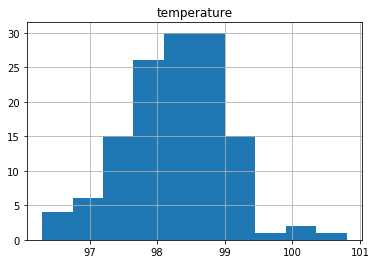

In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as sci

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
df = pd.read_csv('data/human_body_temperature.csv')
temp=df['temperature']
print(df.hist('temperature'))


In [ ]:
The graphs look essentially the same and n>30 at over 100 so sample isnt normal thanks to CLT we can assume a normal distribution.

(array([   5.,   39.,  279., 1060., 2238., 2888., 2131., 1010.,  298.,
         52.]), array([ 95.27203312,  95.81249098,  96.35294884,  96.8934067 ,
        97.43386455,  97.97432241,  98.51478027,  99.05523813,
        99.59569599, 100.13615385, 100.67661171]), <a list of 10 Patch objects>)


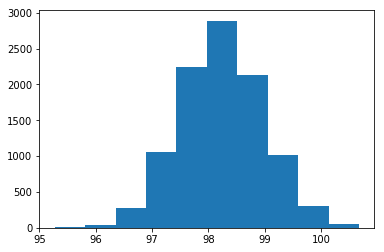

In [24]:
tempnorm=np.random.normal(np.mean(temp),np.std(temp),size=10000)
print(plt.hist(tempnorm))




Question 2 because there are 130 rows and N>30 by central limit theorem sample size is large enough. Also 130 is not all people ever. In addition the graph appears to be slightly less extreme than the sample graph with less values at 96 but more at 99-100. 

In [30]:



# Question 3

#Null hypothesis: H0=98.6
#HA mu!=98.6
print(temp.describe())
#Mean=98.249231



count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64
0.0


In [26]:
boottest=np.empty(5555)
for x in range(len(boottest)):
   bootsample=np.random.choice(temp, size=len(boottest))
   boottest[x]=np.mean(bootsample)
    
p = np.sum(boottest >= 98.6)/5555   
print(p)

#p=0.0 so we discount H0...
#There is only 1 sample and because we dont know population std we use 1 sample t test. 





Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [31]:

ptest= sci.ttest_1samp(temp, 98.6)
print(ptest)


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


Null hypothese is that H0 mu=98.6 HA is the mu!= 98.6. The sample mean is 98.249231...with a tstat of -5.45 and p=0.0 with bootstrap we reject H0. Because we dont know population std nor mean we are going to use a 1 sample T test...as we are only looking at temperature. The results appear to be the same and we reject H0.
. 

In [102]:
#Question 4
sample10 = np.random.choice(temp, size=10)
print(sample10.mean())
ptest10 = sci.ttest_1samp(sample10, 98.6)
print(ptest10)

98.13000000000001
Ttest_1sampResult(statistic=-1.7250368497264172, pvalue=0.11860508483505568)


With a smaller sample of size of 10 it get a lower tstate of -1.006 versus -5.45 but and because of this, we do not reject H0 as .34 is greatter than .05. In addition we got a mean of .05. Running this test over and over leads to different reuslts where sometimes we would reject H0. Hence why using such a small sample is not recommended. 

In [99]:
#Question 5
#First find sample std

bootmean = np.mean(bootsample)
bootci = sci.norm.interval(0.975, loc=np.mean(bootsample))
print(bootci,"bootstrap ci")
#bootstrap CI

tempse=(bootci[1]-bootci[0])/2
print(tempse, "bootstrap s.e")
#bootstrap SE

abcimin,abcimax = sci.norm.interval(0.975, loc=np.mean(temp))
print(abcimin,abcimax, "frequestist ci")
print(abcimax-np.mean(temp), "frequentist s.e")





(95.98378179084688, 100.46658724605678) bootstrap ci
2.2414027276049495 bootstrap s.e
96.00782804162583 100.49063349683573 frequestist ci
2.2414027276049495 frequentist s.e


Based on the bootstrap CI of 97.5% confidence interval we use the scipy function at the mean of bootsample from early question. The result shows that with 97.5% confidence the true population mean is between 95.98 and 100.47. Using the frequentist option we show that wirg 97.5 confidence that the true population is between 96.01 and 100.49. A slightly increased mean based but almost exactly the same. 

(array([ 1.,  2.,  5.,  7.,  8., 14.,  8., 11.,  5.,  4.]),
 array([96.3 , 96.62, 96.94, 97.26, 97.58, 97.9 , 98.22, 98.54, 98.86,
        99.18, 99.5 ]),
 <a list of 10 Patch objects>)

(array([ 3.,  2.,  4., 12., 15., 20.,  6.,  1.,  1.,  1.]),
 array([ 96.4 ,  96.84,  97.28,  97.72,  98.16,  98.6 ,  99.04,  99.48,
         99.92, 100.36, 100.8 ]),
 <a list of 10 Patch objects>)

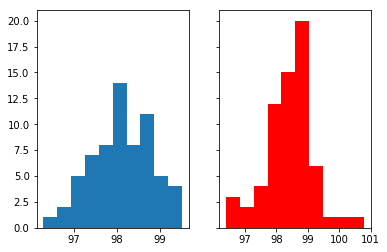

In [100]:
#question 6
M = df[df.gender == 'M']
F = df[df.gender == 'F']
Mtemp=M['temperature']
Ftemp=F['temperature']

fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(Mtemp)
axs[1].hist(Ftemp,color='red')
plt.show()



In [95]:
Mtemp.describe()
Ftemp.describe()

print(Ftemp.mean()-Mtemp.mean(),"Female Mean is bigger than Male Man")
print(Ftemp.std()-Mtemp.std(),"Female STD is bigger than Male STD")

Mcimin,Mcimax = sci.norm.interval(0.975, loc=np.mean(Mtemp))
print(Mcimin,Mcimax, "Male ci")
print(Mcimax-Mtemp.mean(), "Male M.E")

Fcimin,Fcimax = sci.norm.interval(0.975, loc=np.mean(Ftemp))
print(Fcimin,Fcimax, "Female ci")
print(Fcimax-Ftemp.mean(), "Female M.E")



count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

0.289230769230727 Female Mean is bigger than Male Man
0.04473199040477571 Female STD is bigger than Male STD
95.86321265701045 100.34601811222035 Male ci
2.2414027276049495 Male M.E
96.15244342624118 100.63524888145108 Female ci
2.2414027276049495 Female M.E


We can assume that these approximately normal and can use this form of CI because N is still 65...which is >30. Female appears to have a slightly higher mean and slightly higher STD, and thus the CI is slightly bigger on that end but the two margin of errors appear to be exactly the same. Based on the Histograms, females tend to have more extremes with more over 100 and around 97 but also more right around the sample normals of 97-98. 